# Training notebook

* notebooks make sense when used as scripts by humans
* used just for the training part
* uses library extracted
* only training code is still here to be copied and decoupled
* the rest is just instrumentation of stable libraries (which are not copied)
* if you want to change or extend library this follows the same rules as in traditional software development


In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

%load_ext autoreload
%autoreload 2

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.__version__

'2.8.0'

In [3]:
tf.random.set_seed(42)

In [4]:
import numpy as np
np.__version__

'1.22.3'

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 20

In [6]:
import sys

if 'google.colab' in sys.modules:
    !pip install -q dtreeviz
    !pip install -q lrcurve

# Step 1: Loading and exploring our data set

In [7]:
from data import InsuranceData
insuranceData = InsuranceData()

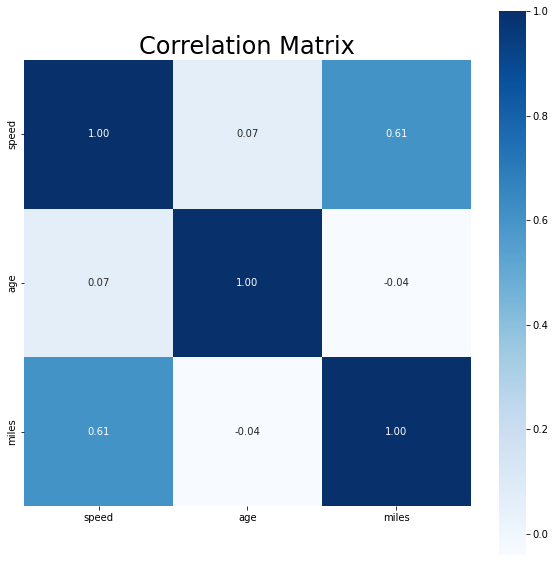

In [8]:
from viz import plot_correlation_matrix
plot_correlation_matrix(insuranceData.get_correlations());

# Step 2: Training a neural network on 2 dimensions of the data

In [9]:
### XXX: THIS IS THE PART THAT ACAUTLLY WANTS TO BE COPIED AND DECOUPLED, THE REST IS JUST INSTRUMENTATION

from tensorflow.keras.layers import InputLayer, Dense, Dropout, \
                                    BatchNormalization, Activation

num_features = insuranceData.dims
dropout = 0.6
model = tf.keras.Sequential()

model.add(InputLayer(name='input', input_shape=(num_features,)))

model.add(Dense(500, name='hidden1'))
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(Dropout(dropout))

model.add(Dense(500, name='hidden2'))
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(Dropout(dropout))

model.add(Dense(500, name='hidden3'))
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(Dropout(dropout))

model.add(Dense(name='output', units=3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 500)               1500      
                                                                 
 activation (Activation)     (None, 500)               0         
                                                                 
 batch_normalization (BatchN  (None, 500)              2000      
 ormalization)                                                   
                                                                 
 hidden2 (Dense)             (None, 500)               250500    
                                                                 
 activation_1 (Activation)   (None, 500)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 500)              2000      
 hNormalization)                                        

In [10]:
from insurance_model import Model

In [11]:
insurance_model = Model(model, insuranceData)
insurance_model.train();

In [14]:
(train_loss, train_metric), (test_loss, test_metric) = insurance_model.evaluate()
# train_loss, test_loss 
train_metric, test_metric

(0.7183333039283752, 0.6666666865348816)

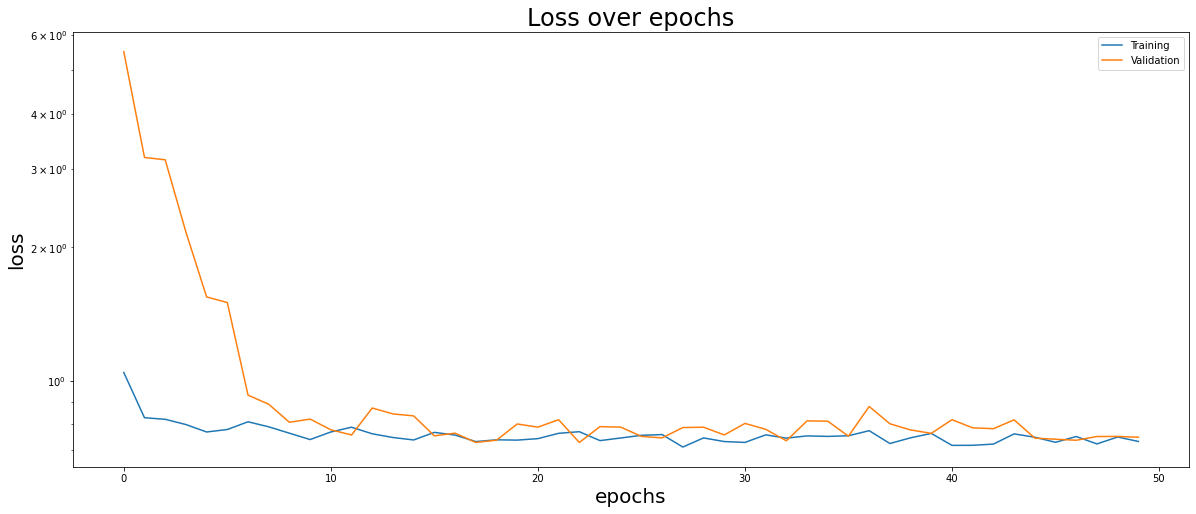

In [15]:
insurance_model.plot_loss();

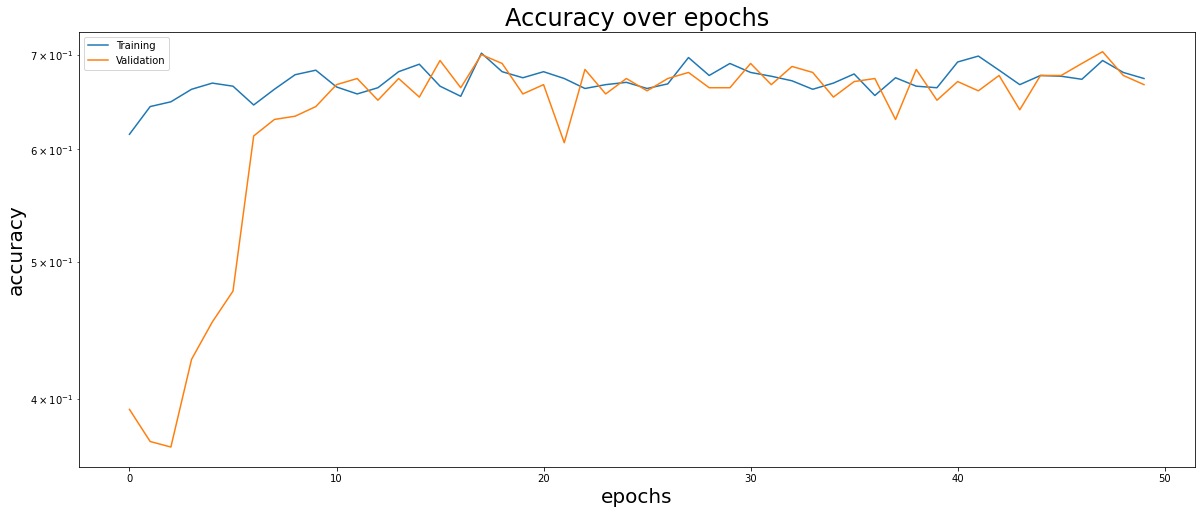

In [16]:
insurance_model.plot_accuracy()

In [17]:
insurance_model.check_model_invariants()

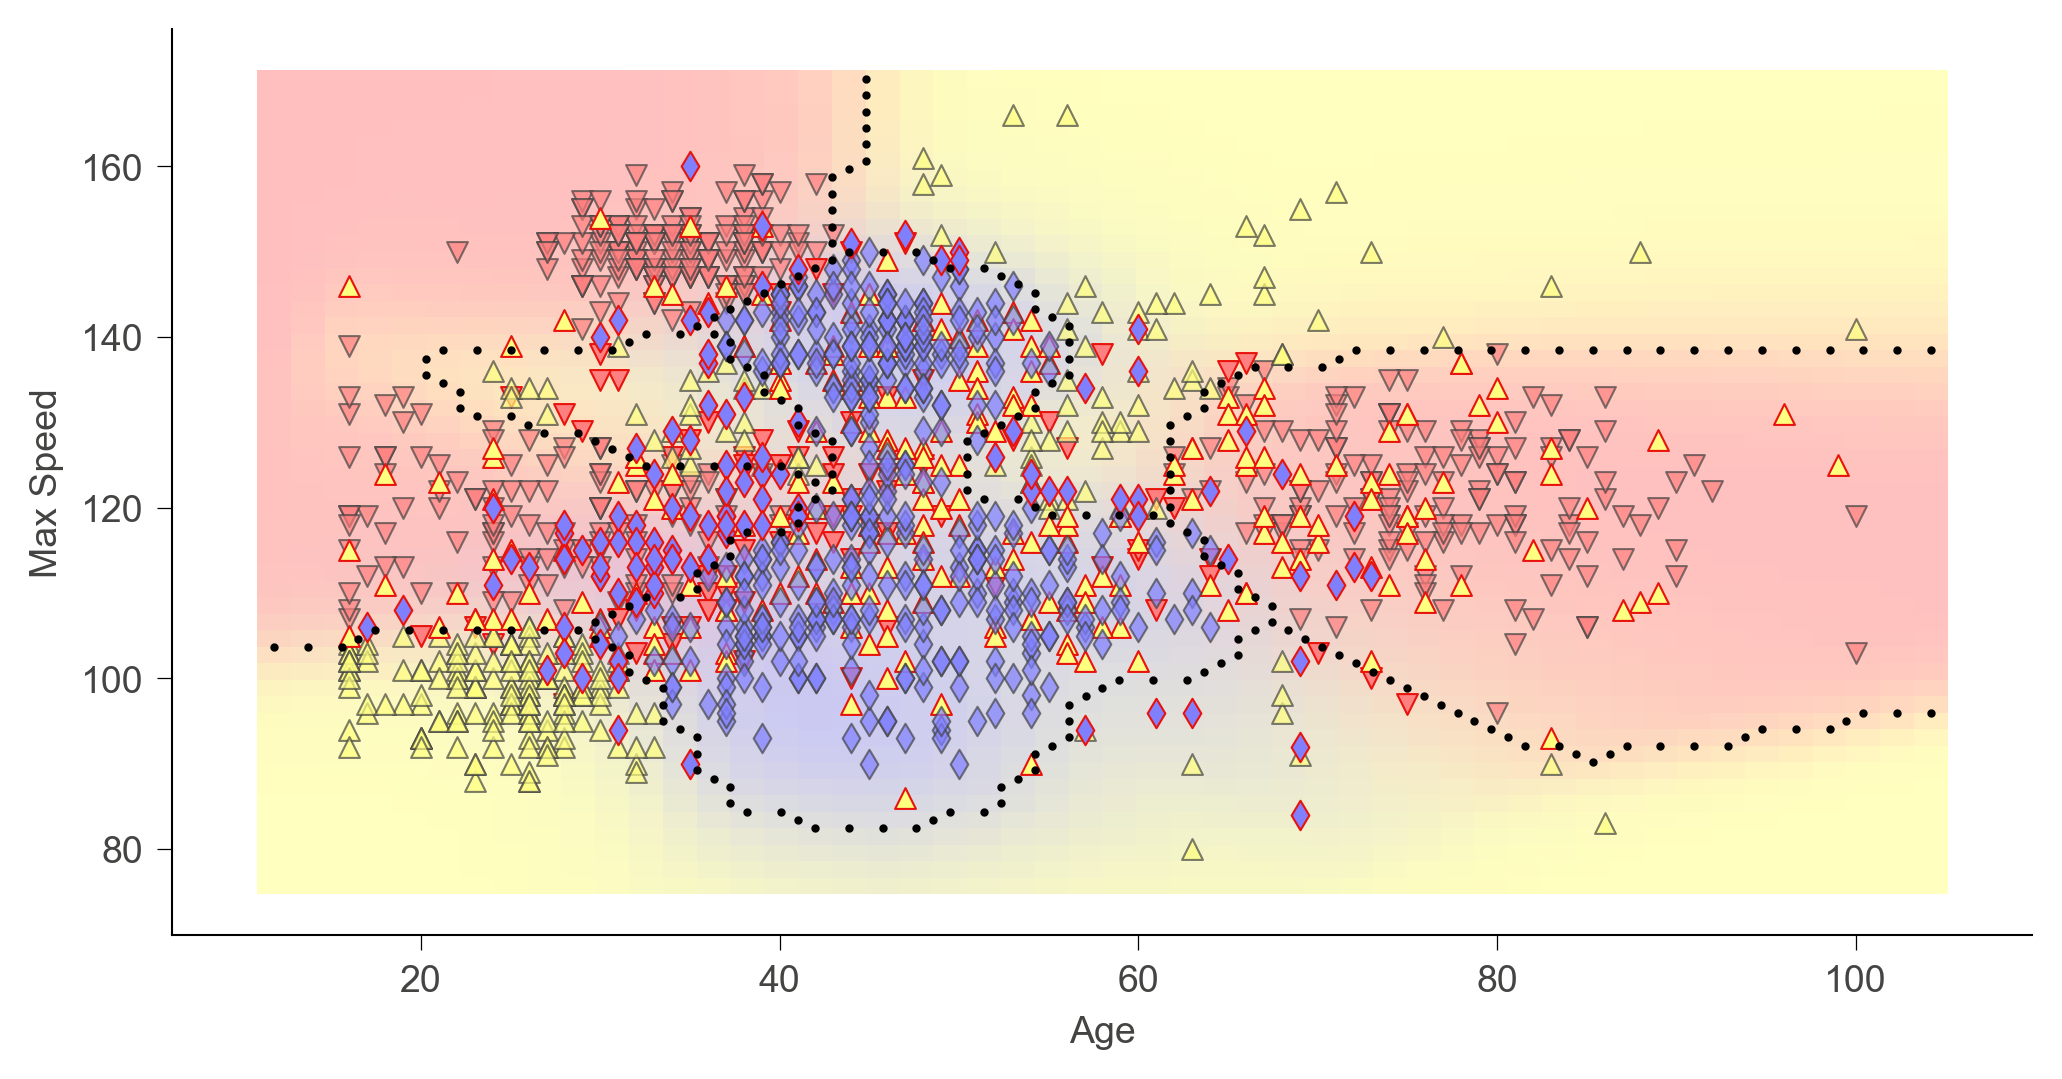

In [18]:
insurance_model.plot_decision_boundaries()

In [19]:
!ls -l

total 2860
drwxr-xr-x 1 oliver.zeigermann 197121       0 Mai 10 16:05 __pycache__
-rw-r--r-- 1 oliver.zeigermann 197121 1380591 Mai  9 13:22 1_all.ipynb
-rw-r--r-- 1 oliver.zeigermann 197121 1391601 Mai  9 13:22 2_train.ipynb
-rw-r--r-- 1 oliver.zeigermann 197121  129055 Mai  9 13:22 3_serve.ipynb
-rw-r--r-- 1 oliver.zeigermann 197121    1886 Mai  9 13:22 data.py
-rw-r--r-- 1 oliver.zeigermann 197121    4271 Mai  9 13:22 insurance_model.py
-rw-r--r-- 1 oliver.zeigermann 197121    1933 Mai  9 13:22 viz.py


In [20]:
insurance_model.save_model('classifier', keras_format=False)

INFO:tensorflow:Assets written to: classifier\assets


In [21]:
!ls -l classifier/

total 284
drwxr-xr-x 1 oliver.zeigermann 197121      0 Mai 10 16:06 assets
-rw-r--r-- 1 oliver.zeigermann 197121  19134 Mai 10 16:06 keras_metadata.pb
-rw-r--r-- 1 oliver.zeigermann 197121 264369 Mai 10 16:06 saved_model.pb
drwxr-xr-x 1 oliver.zeigermann 197121      0 Mai 10 16:06 variables


In [22]:
!tar czvf classifier.tgz ./classifier

a ./classifier
a ./classifier/assets
a ./classifier/keras_metadata.pb
a ./classifier/saved_model.pb
a ./classifier/variables
a ./classifier/variables/variables.data-00000-of-00001
a ./classifier/variables/variables.index
